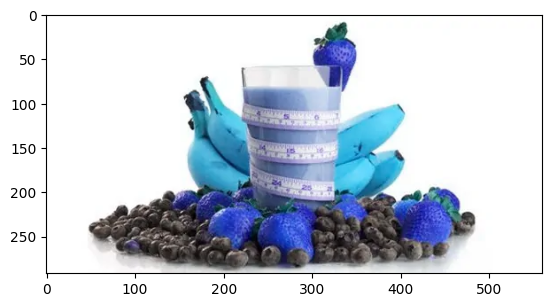

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#def detect_fruits(image_path):
# Učitavanje slike
img = cv2.imread('static/banana_04.png')
plt.imshow(img)




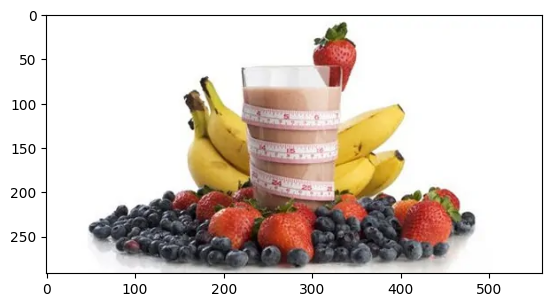

In [50]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV učitava slike kao BGR, a mi želimo RGB
plt.imshow(img)

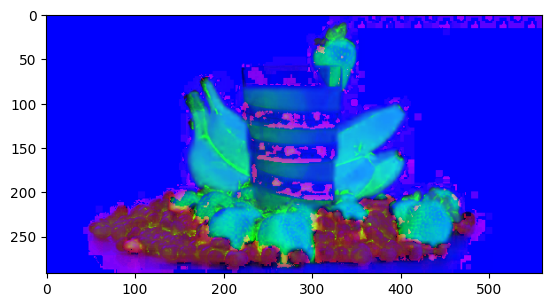

In [51]:
# Pretvorba u HSV (Hue, Saturation, Value) format
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)

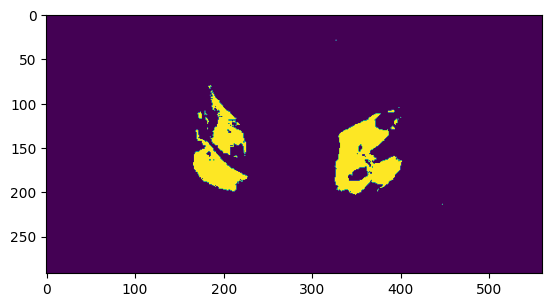

In [52]:
# Definicija raspona boja za detekciju voća (npr. žuta boja za banane)
lower_yellow = np.array([20, 160, 160])
upper_yellow = np.array([30, 255, 255])

# Kreiranje maske za detekciju žute boje
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
plt.imshow(mask)

In [53]:
# Detekcija kontura
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

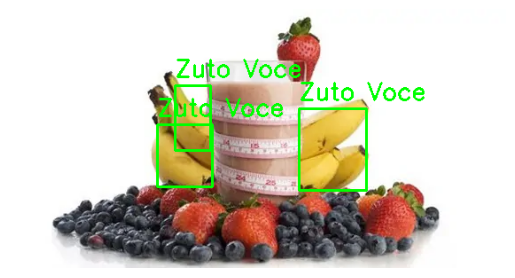

In [54]:
# Crtanje pravokutnika oko detektiranih voćaka
for contour in contours:
    # Filtriranje malih kontura
    if cv2.contourArea(contour) > 500:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, 'Zuto Voce', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Prikaz rezultata
plt.imshow(img)
plt.axis('off')
plt.show()